# Bar example

Lopez de Prado proposes in his book "Advances in Financial Machine Learning" that tick, volume and dollar bars behave better statically  than time stamps.  This note book shows how to build these bars based on the functions of the micfinancekit library.

The data used in this note book was get from:

https://quotes.hegnar.no/quotes/paperdump.php?paper=JPM.N.  

Handler 04/03-2019 *

Downloaded data on March 5, 2019.   The data was used here is only for teaching purposes, note only is showing data fragments, and the csv file is not posted to the public, in order to protect copyrights owner.

**COPYRIGHT DISCLAIMER UNDER SECTION 107 OF THE COPYRIGHT ACT 1976 Copyright Dislcaimer Under Section 107 of the Copyright Act 1976, allowance is made for “fair use” for purposes such as criticism, comment, news reporting, teaching, scholarship, and research. Fair use is a use permitted by copyright statue that might otherwise be infringing. Non-profit, educational, or personal use tips the balance in favor of fair use.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import microfinkitv_0_2 as mf
import seaborn as sns
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df = pd.read_csv('20190304JPMT.csv')

In [3]:
df.head()

,time,price,quantity,source,buyer,seller,initiator
0,20190304T153000,104.92,100,Auto trade,nan,nan,nan
1,20190304T153000,104.93,100,Auto trade,nan,nan,nan
2,20190304T153000,104.95,300,Auto trade,nan,nan,nan
3,20190304T153003,104.85,153119,Auto trade,nan,nan,nan
4,20190304T153003,104.93,100,Auto trade,nan,nan,nan


In [4]:
# Transform time stamp
df['time']=df.time.str.replace("T", "")
df["time"] = pd.to_datetime(df["time"])
df.head()

,time,price,quantity,source,buyer,seller,initiator
0,2019-03-04 15:30:00,104.92,100,Auto trade,nan,nan,nan
1,2019-03-04 15:30:00,104.93,100,Auto trade,nan,nan,nan
2,2019-03-04 15:30:00,104.95,300,Auto trade,nan,nan,nan
3,2019-03-04 15:30:03,104.85,153119,Auto trade,nan,nan,nan
4,2019-03-04 15:30:03,104.93,100,Auto trade,nan,nan,nan


In [5]:
# Copy the data frame time , price  and quantity columns
dfp = df[['time','price','quantity']].copy()

In [6]:
dfp['dollar'] = dfp['price'] * dfp['quantity']

In [7]:
dfp.head()

,time,price,quantity,dollar
0,2019-03-04 15:30:00,104.92,100,10492.00
1,2019-03-04 15:30:00,104.93,100,10493.00
2,2019-03-04 15:30:00,104.95,300,31485.00
3,2019-03-04 15:30:03,104.85,153119,16054527.15
4,2019-03-04 15:30:03,104.93,100,10493.00


# Computing Tick Bar

The function use six arguments:
- df: Pandas dataframe with price, quantity and dollar (price times quantity) information
- price_column: Column name for bar's kind
- dollar_column: Transaction amount column (price x quantity)
- vol_column: Stock quantity transactions
- treshold: int(), Threshold value for bar's kind
- flag:   
          * 0 if the bar is a tick bar
          * 1 if the bar is a volume bar 
          * 2 if if the bar is dollar bar 

Even though the bar is definited by the flag, all information columns (price, quantity, and dollar) has some purpose in bar table construction to get aditional information, like stock volumen acumulated, and amount or dollar transaction acumulated.

In this case the threshold is 40 ticks, and the flag is 0, indicating the computed bar is a tick bar

In [8]:
dft = mf.bar_df(dfp, 'price', 'quantity', 'dollar', 40, 0)

In [9]:
dft.head()

,time,close_b,open_b,avg_b,max_b,min_b,vol_acum_b,dollar_acum_b,vwap_b
39,2019-03-04 15:30:18,104.95,104.92,104.95,105.02,104.80,159716,16747034.35,104.86
79,2019-03-04 15:30:47,104.92,104.96,104.97,105.05,104.91,11400,1196759.96,104.98
119,2019-03-04 15:31:00,105.02,104.92,104.99,105.06,104.92,16706,1754498.37,105.02
159,2019-03-04 15:31:14,105.04,105.05,105.04,105.08,105.00,10971,1152290.07,105.03
199,2019-03-04 15:31:34,105.08,105.04,105.04,105.09,104.99,6605,693813.51,105.04


In [10]:
# Subset  from the sample
dftplot = dft.set_index('time')[:100]

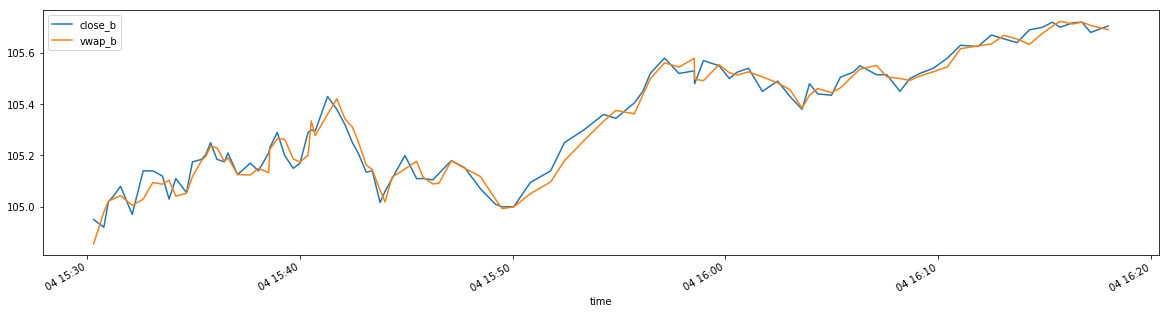

In [11]:
# Time series plot from the tick bar
dftplot[['close_b', 'vwap_b' ]].plot(figsize=(20,5))

# Volume Bar

The only difference with tick bar is the flag argument, in this case is the flag value is 1, and 10000 stocks volume as stock quantity threshold

In [12]:
dfv = mf.bar_df(dfp, 'price', 'quantity', 'dollar', 10000, 1)

In [13]:
dfv.head()

,time,close_b,open_b,avg_b,max_b,min_b,vol_acum_b,dollar_acum_b,vwap_b
3,2019-03-04 15:30:03,104.85,104.92,104.91,104.95,104.85,153619,16106997.15,104.85
60,2019-03-04 15:30:36,105.02,104.93,104.97,105.05,104.80,10135,1064067.25,104.99
94,2019-03-04 15:30:57,104.97,105.03,104.94,105.03,104.91,10067,1056573.81,104.95
111,2019-03-04 15:30:59,105.04,104.99,105.02,105.06,104.98,12604,1323930.30,105.04
145,2019-03-04 15:31:13,105.05,105.01,105.04,105.08,105.00,10338,1085791.12,105.03


In [14]:
# Subset  from the sample
dfvplot = dfv.set_index('time')[:100]

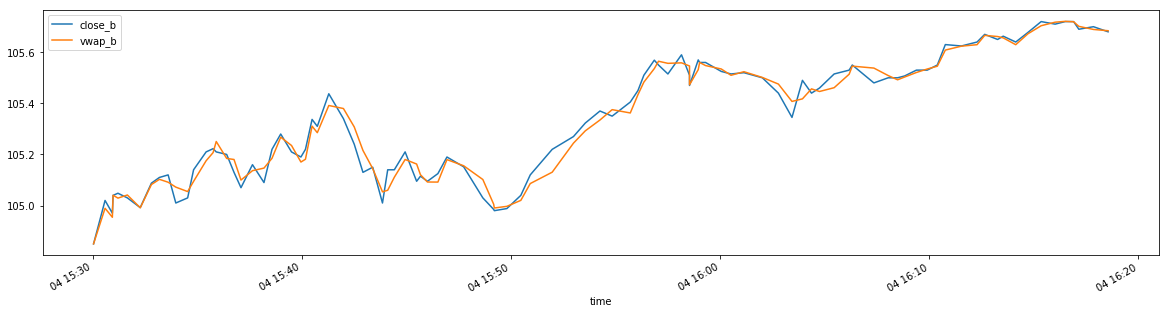

In [15]:
# Time series plot from the volume bar
dfvplot[['close_b', 'vwap_b' ]].plot(figsize=(20,5))

# Dollar Bar

Here, the flag values is 2 and $25,000,000  amount traded as dollar threshold


In [16]:
dfd = mf.bar_df(dfp, 'price', 'quantity', 'dollar', 25000000, 2)

In [17]:
dfd.head()

,time,close_b,open_b,avg_b,max_b,min_b,vol_acum_b,dollar_acum_b,vwap_b
301,2019-03-04 15:32:51,105.05,104.92,105.01,105.14,104.80,238348,25005686.03,104.91
1419,2019-03-04 15:42:34,105.30,105.06,105.20,105.44,104.99,237793,25016268.01,105.20
2318,2019-03-04 15:54:51,105.35,105.29,105.13,105.40,104.97,237848,25005831.75,105.13
3041,2019-03-04 16:04:23,105.44,105.34,105.49,105.62,105.32,238009,25110545.59,105.50
3900,2019-03-04 16:16:31,105.72,105.44,105.59,105.74,105.41,236794,25001999.83,105.59


In [18]:
# Subset  from the sample
dfdplot = dfv.set_index('time')[:100]

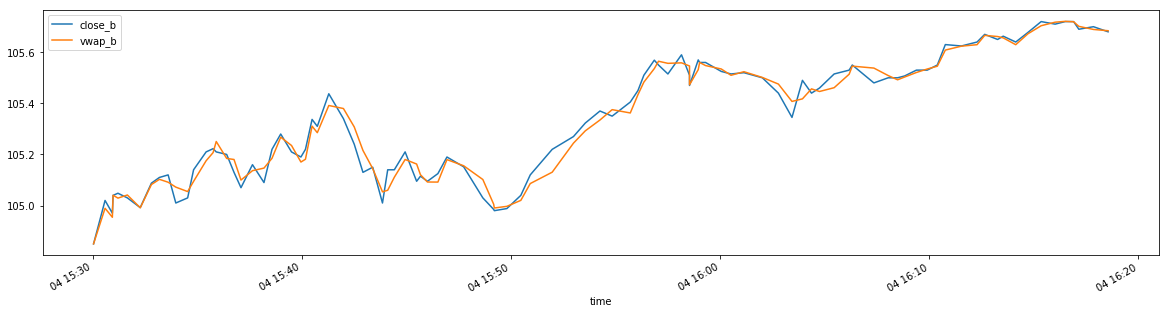

In [19]:
# Time series plot from the dollar bar
dfdplot[['close_b', 'vwap_b' ]].plot(figsize=(20,5))

# Time bar

In [20]:
idx = dfp.reset_index().set_index('time').resample('1T').last().reset_index()['index'].values.tolist()
index_val = dfp.reset_index().set_index('time').resample('1T')['index'].last()
pricedf = dfp.reset_index().set_index('time').resample('1T')['price'].ohlc()
volumendf = dfp.reset_index().set_index('time').resample('1T')['quantity','dollar'].sum()
averagedf = dfp.reset_index().set_index('time').resample('1T')['price'].mean()
vwap = mf.vwap(dfp, 'quantity','dollar',idx)
vwappd = pd.DataFrame(list(zip(idx, vwap)), columns=['index','vwap']).set_index('index')
dfmin = pd.concat([pd.concat([index_val,pricedf,averagedf, volumendf],axis=1, sort=False).reset_index().set_index('index'),
                      vwappd],axis=1, sort=False)
dfmin.rename(columns={'close' : 'close_b', 
                         'open' : 'open_b', 
                         'high' : 'close_b',
                         'price' : 'avg_b', 
                         'high' : 'max_b', 
                         'low' : 'min_b', 
                         'quantity' :'vol_acum_b', 
                         'dollar' : 'dollar_acum_b', 
                         'vwap' : 'vwap_b'},
                inplace=True) 
dfmin.head()

,time,open_b,max_b,min_b,close_b,avg_b,vol_acum_b,dollar_acum_b,vwap_b
index,,,,,,,,,
113,2019-03-04 15:30:00,104.92,105.06,104.80,105.02,104.97,186792,19590108.18,104.88
225,2019-03-04 15:31:00,105.02,105.09,104.96,104.96,105.03,23349,2452356.74,105.03
309,2019-03-04 15:32:00,105.00,105.14,104.96,105.09,105.05,31307,3289025.25,105.06
416,2019-03-04 15:33:00,105.11,105.17,104.99,104.99,105.10,24476,2572179.68,105.09
527,2019-03-04 15:34:00,104.99,105.18,104.99,105.18,105.09,23693,2489825.89,105.09


In [21]:
# Subset  from the sample
dfminplot = dfmin.set_index('time')[:47]

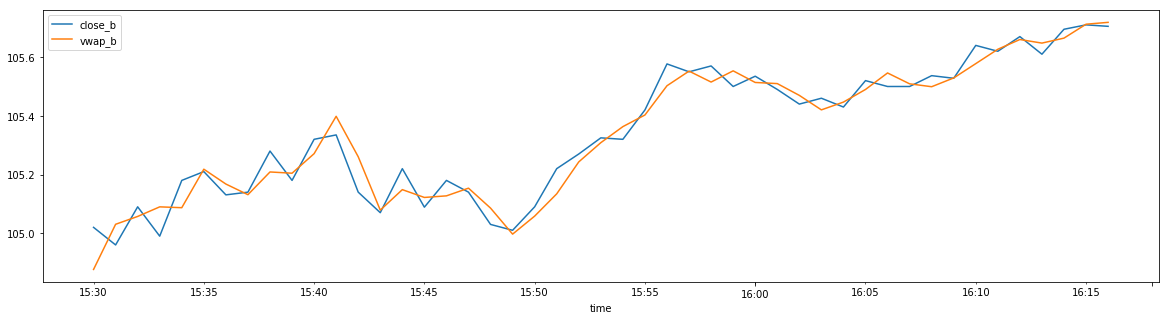

In [22]:
# Time series plot from the time bar
dfminplot[['close_b', 'vwap_b' ]].plot(figsize=(20,5))

# Bars plots comparison

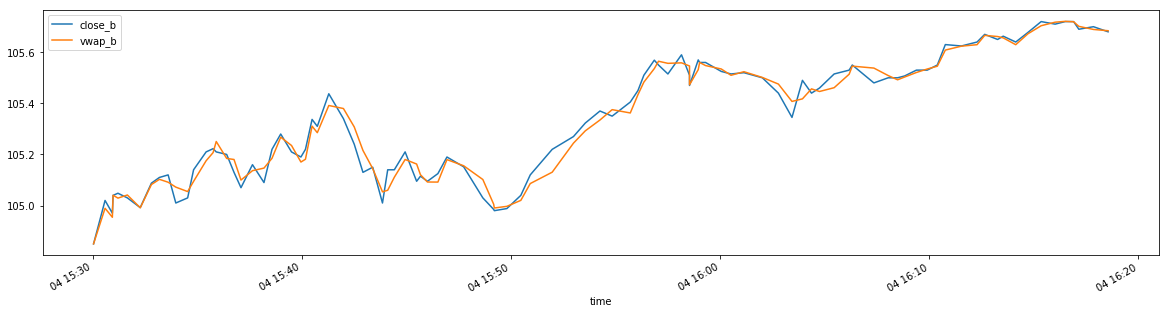

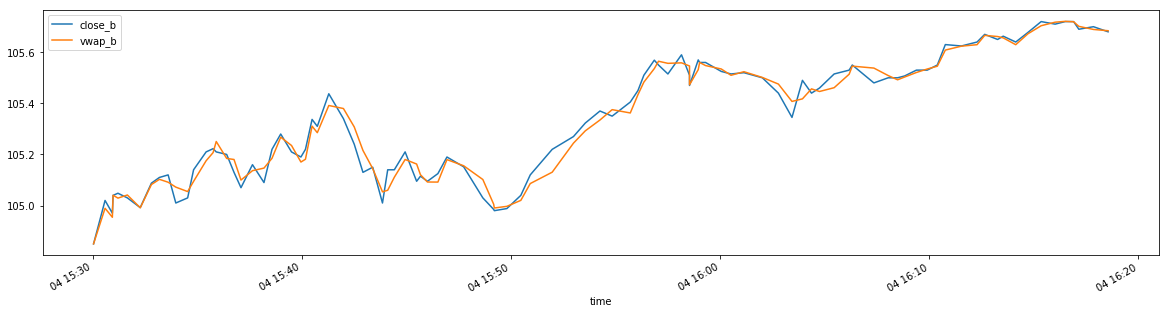

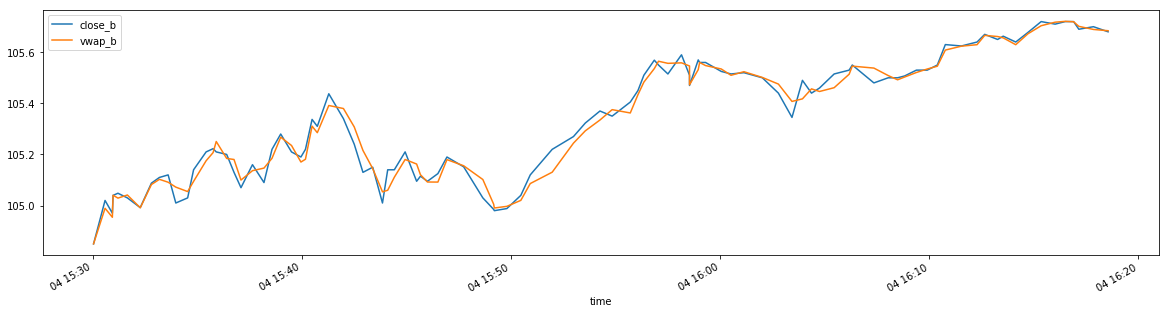

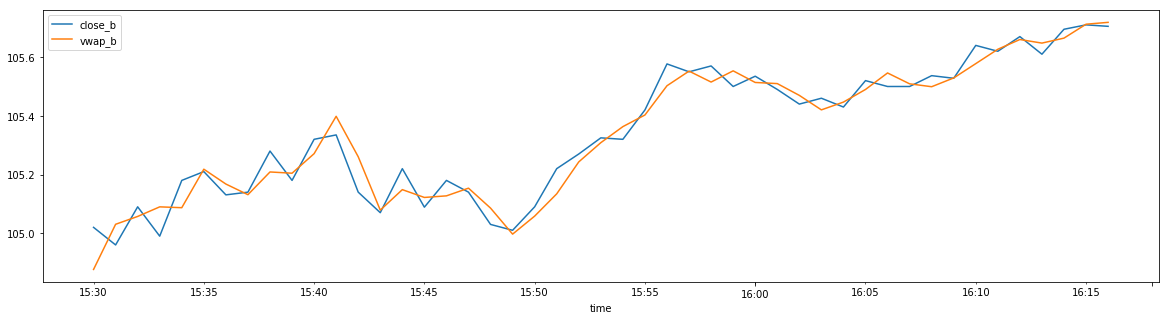

In [23]:
dfdplot[['close_b', 'vwap_b' ]].plot(figsize=(20,5), label='tick bar')
dfdplot[['close_b', 'vwap_b' ]].plot(figsize=(20,5), label='volume bar')
dfdplot[['close_b', 'vwap_b' ]].plot(figsize=(20,5), label='dollar bar')
dfminplot[['close_b', 'vwap_b' ]].plot(figsize=(20,5))